# Manikanta Reddy Nayini
## Project 2
###  In this project NumPy is used to implement vectorized linear and polynomial regression models and compare their performance using separate training and validation sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Use the NumPy load() method to read the dataset. The data contains two arrays:'features', which contains the variables CRIM through LSTAT, and 'target', which contains the variable MEDV.


In [2]:
data = np.load('boston.npz')

#### 2. Set aside the first 102 items (20% of the total) as a test set, and the remaining 404 items for training.

In [3]:
validation_x =  data['features'][0:102]
validation_t =  data['target'][0:102]
training_x = data['features'][102:506]
training_t = data['target'][102:506]

In [4]:
X = np.array(training_x[:,5])
t = np.array(training_t)
tempx = X
tempt = t

In [5]:
print(X.shape)
print(t.T.shape)

(404,)
(404,)


#### 3. Create a scatterplot of the training data showing the relationship between the number ofrooms and the median value of a home. Does the relationship appear to be linear?

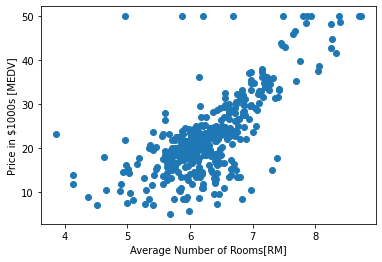

In [6]:
plt.scatter(tempx, tempt)
plt.xlabel('Average Number of Rooms[RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

#### 4. With RM as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of RM?

In [7]:
X = np.reshape(X, (-1, 1))
print(X.shape)
X = np.hstack((np.ones_like(X),X))
print(X.shape)
print(X)
XT = X.T
XTt = np.dot(XT,t)
XTX = np.dot(XT,X)
invX = np.linalg.inv(XTX)
w = np.dot(invX,XTt)
print(w[0],w[1])

(404, 1)
(404, 2)
[[1.    5.96 ]
 [1.    6.678]
 [1.    6.416]
 [1.    5.412]
 [1.    6.333]
 [1.    5.965]
 [1.    5.856]
 [1.    6.951]
 [1.    5.885]
 [1.    5.782]
 [1.    6.151]
 [1.    6.816]
 [1.    5.787]
 [1.    5.593]
 [1.    6.122]
 [1.    5.019]
 [1.    6.315]
 [1.    5.012]
 [1.    5.705]
 [1.    5.905]
 [1.    6.549]
 [1.    7.041]
 [1.    6.209]
 [1.    8.398]
 [1.    6.29 ]
 [1.    6.852]
 [1.    8.704]
 [1.    5.87 ]
 [1.    8.247]
 [1.    5.731]
 [1.    5.605]
 [1.    7.249]
 [1.    6.437]
 [1.    6.593]
 [1.    5.803]
 [1.    6.458]
 [1.    6.114]
 [1.    7.333]
 [1.    6.438]
 [1.    5.706]
 [1.    5.036]
 [1.    5.836]
 [1.    7.454]
 [1.    5.92 ]
 [1.    6.009]
 [1.    6.431]
 [1.    5.608]
 [1.    6.245]
 [1.    6.317]
 [1.    6.487]
 [1.    5.404]
 [1.    6.474]
 [1.    5.927]
 [1.    6.98 ]
 [1.    5.682]
 [1.    5.759]
 [1.    6.393]
 [1.    5.456]
 [1.    6.421]
 [1.    6.004]
 [1.    6.319]
 [1.    6.415]
 [1.    7.185]
 [1.    6.193]
 [1.    3.863]
 [1.   

#### 5. Use w to add a line representing the least squares fit to your scatter plot from experiment (3). How well does the model appear to fit the training set?

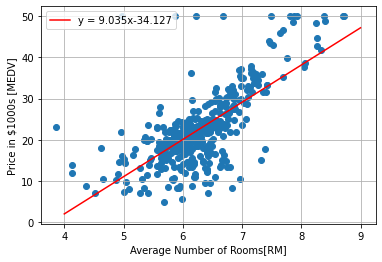

In [8]:
x = np.linspace(4,9,404)
y = w[1]*x + w[0]
plt.plot(x, y, '-r', label='y = 9.035x-34.127')
plt.legend(loc='upper left')
plt.scatter(tempx, tempt)
plt.xlabel('Average Number of Rooms[RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.grid()
plt.show()

#### 6. Use w to find the predicted response for each value of the RM attribute in the training set, then compute the average loss 𝓛 for the model.

In [9]:
tnew = np.dot(X,w)
temp = 0
for i in range(404):
    res = (t[i] - tnew[i])
    res = res*res
    temp = temp+res
print("loss :",temp/404)

loss : 41.056548831382216


#### 7. Repeat experiment (6) for the test set. How do the training and test MSE values compare? What accounts for the difference?

In [10]:
X = np.array(validation_x[:,5])
t = np.array(validation_t)

In [11]:
X = np.reshape(X, (-1, 1))
X = np.hstack((np.ones_like(X),X))
tnew = np.dot(X,w)
temp = 0
for i in range(102):
    res = (t[i] - tnew[i])
    res = res*res
    temp = temp+res
print("loss :",temp/102)

loss : 53.767877955423245


#### 8. Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and test MSEs for this model compare to the values you found for experiment (7)? What accounts for the difference?

In [12]:
X = training_x
t = training_t
t = np.reshape(t, (-1, 1))
b = np.ones((404,1))
X = np.hstack((b,X))
print(X.shape)
print(t.shape)

(404, 14)
(404, 1)


In [13]:
XT = X.T
XTt = np.dot(XT,t)
XTX = np.dot(XT,X)
invX = np.linalg.inv(XTX)
w = np.dot(invX,XTt)
print(w)

[[ 3.19642409e+01]
 [-1.14552861e-01]
 [ 4.48932130e-02]
 [ 2.83755698e-02]
 [ 2.70909742e+00]
 [-1.67403672e+01]
 [ 4.11148209e+00]
 [-8.47905081e-04]
 [-1.38493905e+00]
 [ 3.21084569e-01]
 [-1.22497115e-02]
 [-9.12523500e-01]
 [ 1.02533638e-02]
 [-4.78414631e-01]]


In [14]:
print(X.shape)

(404, 14)


In [15]:
tnew = np.dot(X,w)
temp = 0
for i in range(404):
    res = (t[i] - tnew[i])
    res = res*res
    temp = temp+res
print("Average loss for training data:",temp/404)

Average loss for training data: [21.80719958]


In [16]:
X = validation_x
t = validation_t
print(X.shape)
print(t.shape)
t = np.reshape(t, (-1, 1))
b = np.ones((102,1))
X = np.hstack((b,X))
print(X.shape)
print(t.shape)

(102, 13)
(102,)
(102, 14)
(102, 1)


In [17]:
tnew = np.dot(X,w)
temp = 0
for i in range(102):
    res = (t[i] - tnew[i])
    res = res*res
    temp = temp+res
print("Average loss for testing data :",temp/102)

Average loss for testing data : [22.8636809]


#### The average loss for testing and training is considerably lower.

##### 9. Using the value that you found for w for this new model, determine for each feature howmuch a one unit increase in that feature would change the median value of a home.Based on the description of the dataset provided by StatLib, convert your answer to dollars.


In [18]:
for i in range(1,14):
    print(w[i][0]*1000)

-114.55286082089144
44.893213009297384
28.375569758667396
2709.097418694938
-16740.367150860948
4111.482091304793
-0.8479050808641864
-1384.9390491423605
321.08456938247355
-12.249711458006018
-912.5235000500993
10.253363767853907
-478.41463137789833


In [19]:
values = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']


In [20]:
for i in range(1,14):
    print(values[i-1],'  $',w[i][0]*1000)

CRIM   $ -114.55286082089144
ZN   $ 44.893213009297384
INDUS   $ 28.375569758667396
CHAS   $ 2709.097418694938
NOX   $ -16740.367150860948
RM   $ 4111.482091304793
AGE   $ -0.8479050808641864
DIS   $ -1384.9390491423605
RAD   $ 321.08456938247355
TAX   $ -12.249711458006018
PTRATIO   $ -912.5235000500993
B   $ 10.253363767853907
LSTAT   $ -478.41463137789833


#### 10. Based on the amount of change in the value of a home, which features are most important?

> The NOX feature is most important as it is has most negative value:        -16740$